          PC1       PC2
0   -0.014640 -0.869949
1   -0.133196 -0.799381
2   -0.131749 -0.819928
3   -0.140333 -0.822608
4   -0.107791 -0.794721
..        ...       ...
174  4.851297 -0.924205
175  5.694928 -1.384011
176  3.731552  1.124703
177  5.374396 -0.910951
178  4.808733  0.802493

[179 rows x 2 columns]


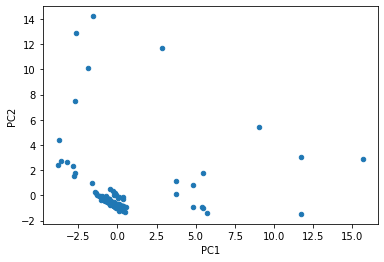

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

dataA = pd.read_csv('../5. Dataset PCA/MeterC_pca_all.csv')
dataA_feature = dataA[['PC1','PC2']]
print(dataA_feature)
_ = dataA_feature.plot.scatter(x='PC1',y='PC2')

In [2]:
# scaler = MinMaxScaler()
# scaler.fit(dataA_feature.PC1)
# dataA_feature.PC1 = scaler.transform(dataA_feature.PC1)

# # scaler.fit(dataA_feature['PC2'])
# # dataA_feature['PC2'] = scaler.transform(dataA_feature['PC2'])
# dataA_feature

In [3]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [4]:
y_predict = km.fit_predict(dataA_feature[['PC1','PC2']])
dataA_feature['Cluster'] = y_predict+1
dataA_feature

<ipython-input-4-9ea8584dc15b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataA_feature['Cluster'] = y_predict+1


PC1       PC2  Cluster
0   -0.014640 -0.869949        1
1   -0.133196 -0.799381        1
2   -0.131749 -0.819928        1
3   -0.140333 -0.822608        1
4   -0.107791 -0.794721        1
..        ...       ...      ...
174  4.851297 -0.924205        3
175  5.694928 -1.384011        3
176  3.731552  1.124703        3
177  5.374396 -0.910951        3
178  4.808733  0.802493        3

[179 rows x 3 columns]

In [5]:
km.cluster_centers_

array([[-0.50253575, -0.40658644],
       [-1.20003247, 11.27538905],
       [ 4.90166113, -0.05825586],
       [12.0494161 ,  2.48902624]])

No handles with labels found to put in legend.


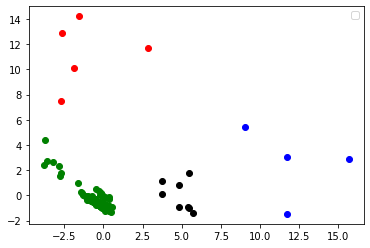

In [6]:
df1 = dataA_feature[dataA_feature.Cluster==1]
df2 = dataA_feature[dataA_feature.Cluster==2]
df3 = dataA_feature[dataA_feature.Cluster==3]
df4 = dataA_feature[dataA_feature.Cluster==4]
plt.scatter(df1['PC1'],df1['PC2'],color='green')
plt.scatter(df2['PC1'],df2['PC2'],color='red')
plt.scatter(df3['PC1'],df3['PC2'],color='black')
plt.scatter(df4['PC1'],df4['PC2'],color='blue')
plt.legend()

In [7]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dataA_feature[['PC1','PC2']])
    sse.append(km.inertia_)

C:\Users\joshh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
sse

[1792.7018393506662,
 1069.9608216857694,
 437.9089971297395,
 284.3648710201069,
 166.7829094591211,
 133.29829178872328,
 108.93412827555356,
 87.9537578586508,
 66.27673241683122]

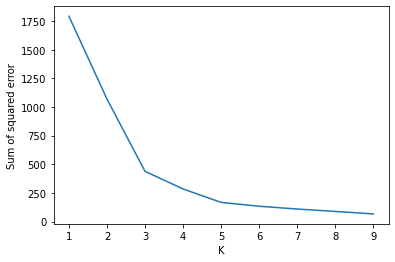

In [9]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)